In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()

In [3]:
# back of the envelope
full_8layer = np.mean([121.48, 121.45, 121.33])
half_8layer = np.mean([80.01, 80.02, 80.22]) # including tanh
mixed_8layer = np.mean([83.84, 83.7, 83.6]) # includes tanh
print('NS 8layer half-prec-tanh speedup is', np.round(1 - half_8layer/full_8layer, 4))
print('NS 8layer mixed-prec-tanh speedup is', np.round(1 - mixed_8layer/full_8layer, 4))

# todo: AMP-only speedup
# todo: Half-prec-no-tanh
# todo: amp+half-no-tanh

NS 8layer half-prec-tanh speedup is 0.3404
NS 8layer mixed-prec-tanh speedup is 0.3105


In [4]:
full_tanh = {'128_h1':.01224, '128_l2':.004647}
full_h1 = [.0123, .01211, .01202]
full_l2 = [.004739, .004629, .004599]
print('full h1', np.round(np.mean(full_h1),4), np.round(np.std(full_h1),4))
print('full l2', np.round(np.mean(full_l2),4), np.round(np.std(full_l2),4))
print('full tanh h1', full_tanh['128_h1'], ' l2 ', full_tanh['128_l2'])

# times: full: 51.72 full-tanh: 52.56

full h1 0.0121 0.0001
full l2 0.0047 0.0001
full tanh h1 0.01224  l2  0.004647


## Plot Runtimes

In [14]:
def plot_runtimes(runtimes, labels, save_name=None):
    plt.figure(figsize=(10, 6))

    x = np.arange(len(runtimes))
    colors = plt.cm.get_cmap('Set3', len(runtimes))

    # Find the index of the slowest method
    slowest_idx = np.argmax(runtimes)
    slowest_time = runtimes[slowest_idx]

    # Calculate speedup percentage for each method
    speedups = [(slowest_time - t) / slowest_time * 100 for t in runtimes]

    # Sort runtimes and labels based on slowest to fastest
    runtimes_sorted, labels_sorted, speedups_sorted = zip(*sorted(zip(runtimes, labels, speedups), reverse=True))

    bars = plt.bar(x, runtimes_sorted, color=colors(x))
    plt.xticks(x, labels_sorted, rotation='horizontal', fontsize=16)
    #plt.xlabel('Methods', fontsize=18)
    plt.ylabel('Time per epoch (seconds)', fontsize=18)
    #plt.title('Runtimes of Methods per Epoch', fontsize=20)
    plt.grid(False)

    # Add text on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{speedups_sorted[i]:.1f}%', ha='center', va='bottom', fontsize=16)

    plt.tight_layout()
    if save_name:
        plt.savefig(save_name, format='pdf')

    plt.show()

/var/folders/4v/hnwq99yn1kv2xbbc7ksr22840000gn/T/ipykernel_31379/2978091769.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(runtimes))


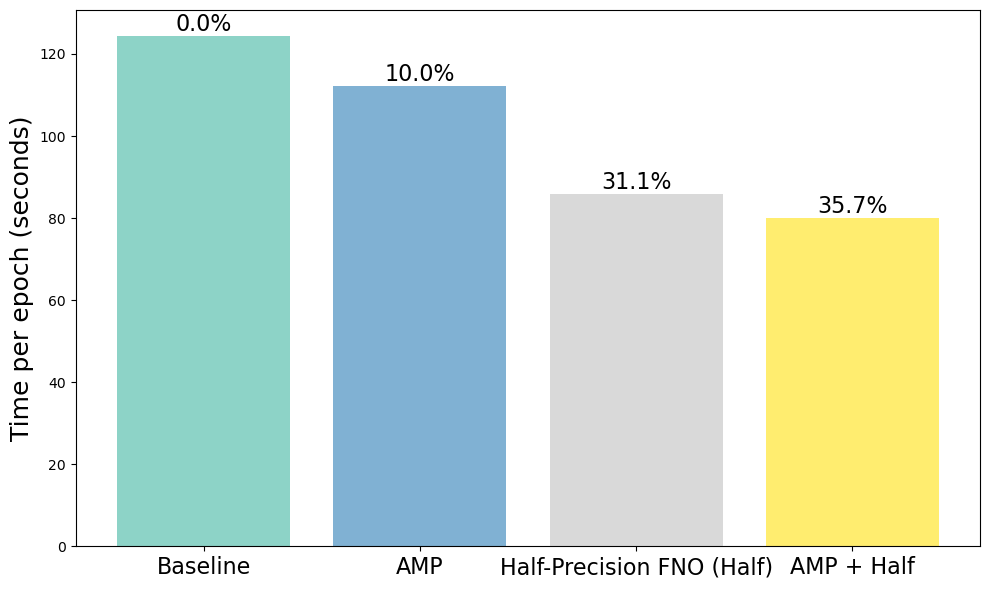

In [17]:
# v100
#runtimes = [43.3, 39.65, 35.01, 30.96,]

runtimes = [124.5, 112.1, 85.8, 80.1]
labels = ['Baseline', 'AMP', 'Half-Precision FNO (Half)', 'AMP + Half']

plot_runtimes(runtimes, labels, save_name='runtimes_v100.pdf')

In [16]:
# 3090
runtimes = [44.44, 42.25, 39.02, 35.63,]
#37.35]
labels = ['Baseline', 'AMP', 'Half-Precision FNO (Half)', 'AMP + Half',]
#'AMP + HP + full-FFT']

#plot_runtimes(runtimes, labels)